In [1]:
#includes
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#dataloader

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224, 224)),
    transforms.Normalize(mean=[0.522, 0.541, 0.521], std=[0.229, 0.224, 0.225]),
    ])

dataset = datasets.ImageFolder(root='/home/naser.al/project/dataset', transform=transform)

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=36, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=36, shuffle=False)

In [3]:
# model definition
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN_1(nn.Module):
    def __init__(self):
        super(CNN_1, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(in_features=32*112*112, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=2)

        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 32*112*112)
        x = self.fc1(x)
        return x

class CNN_2(nn.Module):
    def __init__(self):
        super(CNN_2, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(in_features=64*56*56, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=2)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64*56*56)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    

class CNN_3(nn.Module):
    def __init__(self):
        super(CNN_3, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(in_features=128*28*28, out_features=256)
        self.fc2 = nn.Linear(in_features=256, out_features=2)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(x.size(0), -1) 
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

Trainig models:
Epoch 1/10, Train Loss: 18.523401922649807
Validation Loss: 31.4061, Accuracy: 56.25%
Epoch 2/10, Train Loss: 12.016278955671522
Validation Loss: 7.2247, Accuracy: 57.50%
Epoch 3/10, Train Loss: 2.1069209708107843
Validation Loss: 6.8732, Accuracy: 67.50%
Epoch 4/10, Train Loss: 1.6740330060323079
Validation Loss: 5.3742, Accuracy: 66.25%
Epoch 5/10, Train Loss: 0.706316222747167
Validation Loss: 3.1208, Accuracy: 67.50%
Epoch 6/10, Train Loss: 0.4041219759318564
Validation Loss: 3.8074, Accuracy: 61.25%
Epoch 7/10, Train Loss: 0.334206802977456
Validation Loss: 3.0183, Accuracy: 68.75%
Epoch 8/10, Train Loss: 0.07490863081895643
Validation Loss: 3.1094, Accuracy: 67.50%
Epoch 9/10, Train Loss: 0.029118734538011875
Validation Loss: 3.1730, Accuracy: 71.25%
Epoch 10/10, Train Loss: 0.011529021465826695
Validation Loss: 3.2177, Accuracy: 68.75%


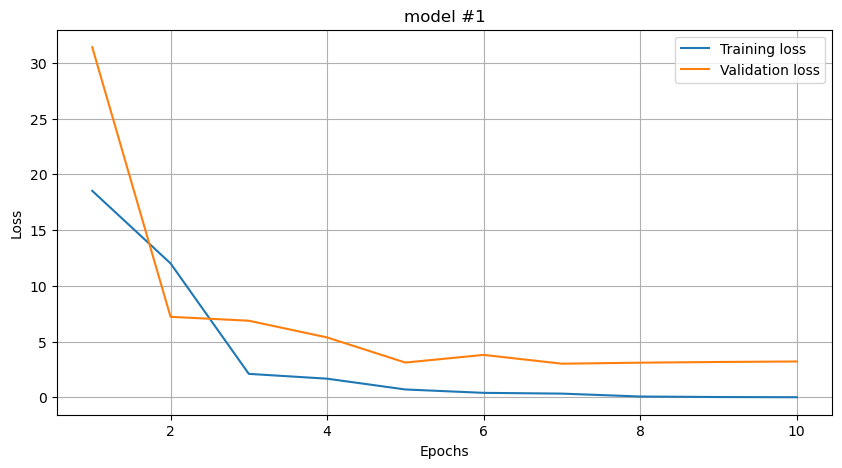

Epoch 1/10, Train Loss: 2.5398478044403925
Validation Loss: 0.9088, Accuracy: 52.50%
Epoch 2/10, Train Loss: 0.6493062443203397
Validation Loss: 0.7285, Accuracy: 52.50%
Epoch 3/10, Train Loss: 0.6079998215039571
Validation Loss: 0.7014, Accuracy: 60.00%
Epoch 4/10, Train Loss: 0.5249912242094675
Validation Loss: 0.8763, Accuracy: 61.25%
Epoch 5/10, Train Loss: 0.46303603715366787
Validation Loss: 0.7213, Accuracy: 67.50%
Epoch 6/10, Train Loss: 0.35169757074779934
Validation Loss: 0.7988, Accuracy: 63.75%
Epoch 7/10, Train Loss: 0.24842959311273363
Validation Loss: 0.8010, Accuracy: 65.00%
Epoch 8/10, Train Loss: 0.16717919458945593
Validation Loss: 0.9888, Accuracy: 66.25%
Epoch 9/10, Train Loss: 0.1603882842593723
Validation Loss: 1.1651, Accuracy: 65.00%
Epoch 10/10, Train Loss: 0.14003518472115198
Validation Loss: 1.1948, Accuracy: 62.50%


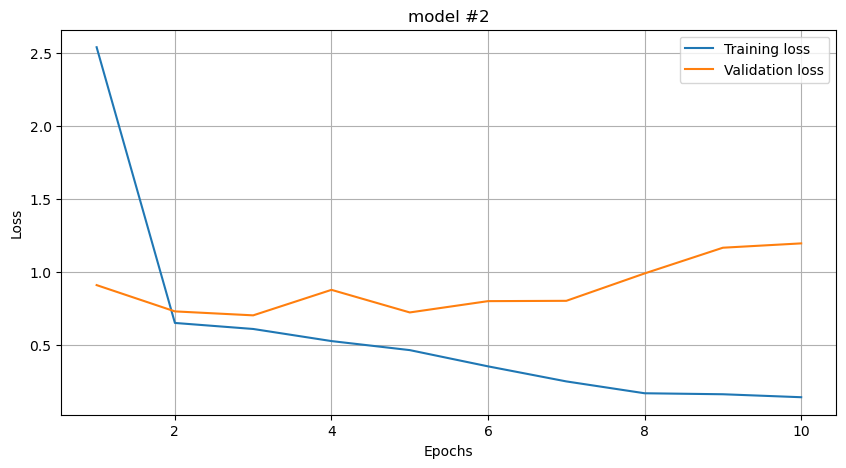

Epoch 1/10, Train Loss: 1.5774486462275188
Validation Loss: 0.6970, Accuracy: 47.50%
Epoch 2/10, Train Loss: 0.6399378445413377
Validation Loss: 0.8205, Accuracy: 52.50%
Epoch 3/10, Train Loss: 0.575903958744473
Validation Loss: 0.7402, Accuracy: 62.50%
Epoch 4/10, Train Loss: 0.5466359555721283
Validation Loss: 0.7622, Accuracy: 61.25%
Epoch 5/10, Train Loss: 0.514302498764462
Validation Loss: 0.7152, Accuracy: 61.25%
Epoch 6/10, Train Loss: 0.4747362964683109
Validation Loss: 0.7441, Accuracy: 62.50%
Epoch 7/10, Train Loss: 0.4223417143026988
Validation Loss: 0.7419, Accuracy: 65.00%
Epoch 8/10, Train Loss: 0.3621656099955241
Validation Loss: 0.7450, Accuracy: 66.25%
Epoch 9/10, Train Loss: 0.28325270116329193
Validation Loss: 0.8853, Accuracy: 72.50%
Epoch 10/10, Train Loss: 0.21336909549103844
Validation Loss: 0.9290, Accuracy: 71.25%


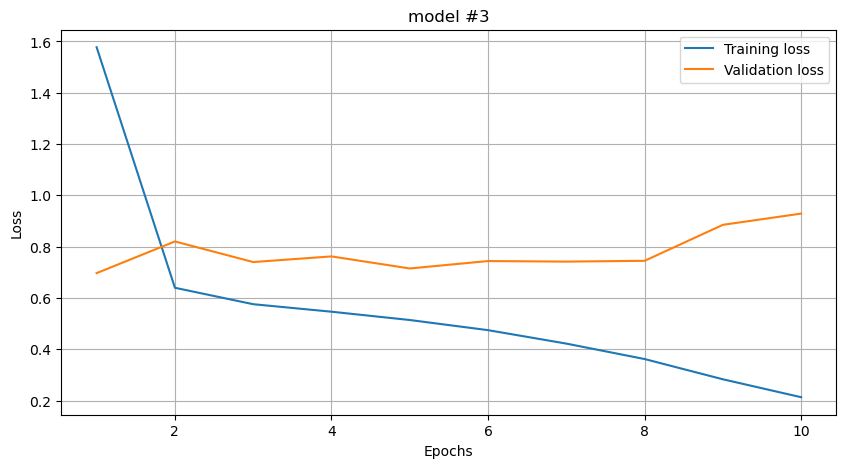

In [ ]:
#training
import torch.optim as optim
import matplotlib.pyplot as plt
model_1 = CNN_1()
model_2 = CNN_2()
model_3 = CNN_3()

loss_func = nn.CrossEntropyLoss()

optimizer_1 = optim.Adam(model_1.parameters(), lr=0.001)
optimizer_2 = optim.Adam(model_2.parameters(), lr=0.001)
optimizer_3 = optim.Adam(model_3.parameters(), lr=0.001)

def train_model(model, optimizer, loss_func, loader,val_loader, model_num, epochs = 10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.train()
    train_losses = []
    val_losses = []
    for epoch in range(epochs):
        total_loss = 0.0
        for image, label in loader:
            image, label = image.to(device), label.to(device)
            optimizer.zero_grad()
            output = model(image)
            loss = loss_func(output,label)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        
        epoch_loss = total_loss / len(train_loader)
        train_losses.append(epoch_loss)
        print(f'Epoch {epoch + 1}/{epochs}, '
                f'Train Loss: {total_loss / len(loader)}')
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = loss_func(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_loss /= len(val_loader)
        val_losses.append(val_loss)
        accuracy = 100 * correct / total
        print(f'Validation Loss: {val_loss:.4f}, Accuracy: {accuracy:.2f}%')
        
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, epochs + 1), train_losses, label='Training loss')
    plt.plot(range(1, epochs + 1), val_losses, label='Validation loss')
    plt.title(f'model #{model_num}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend()
    plt.show()
        
print("Trainig models:")
train_model(model_1, optimizer_1, loss_func, train_loader, val_loader, 1)
train_model(model_2, optimizer_2, loss_func, train_loader, val_loader, 2)
train_model(model_3, optimizer_3, loss_func, train_loader, val_loader, 3)



Epoch 1/10, Train Loss: 3.217748443285624
Epoch 2/10, Train Loss: 3.217748443285624
Epoch 3/10, Train Loss: 3.217748443285624
Epoch 4/10, Train Loss: 3.217748443285624
Epoch 5/10, Train Loss: 3.217748443285624
Epoch 6/10, Train Loss: 3.217748443285624
Epoch 7/10, Train Loss: 3.217748443285624
Epoch 8/10, Train Loss: 3.217748443285624
Epoch 9/10, Train Loss: 3.217748443285624
Epoch 10/10, Train Loss: 3.217748443285624
Epoch 1/10, Train Loss: 1.194847087065379
Epoch 2/10, Train Loss: 1.194847087065379
Epoch 3/10, Train Loss: 1.194847087065379
Epoch 4/10, Train Loss: 1.194847087065379
Epoch 5/10, Train Loss: 1.194847087065379
Epoch 6/10, Train Loss: 1.194847087065379
Epoch 7/10, Train Loss: 1.194847087065379
Epoch 8/10, Train Loss: 1.194847087065379
Epoch 9/10, Train Loss: 1.194847087065379
Epoch 10/10, Train Loss: 1.194847087065379
Epoch 1/10, Train Loss: 0.9290110468864441
Epoch 2/10, Train Loss: 0.9290110468864441
Epoch 3/10, Train Loss: 0.9290110468864441
Epoch 4/10, Train Loss: 0.929